# Python Module Overview

SimplifyLine does both 2D and 3D line simplication. It operates on contigous buffer array of points, so only c-style numpy arrays. Import as so:

In [12]:
import simplifyline
print("My version is {}".format(simplifyline.__version__))
print("My version is {}".format(simplifyline.get_simplifyline_version()))

My version is 0.0.1
My version is SimplifyLine 0.0.1


Now we can use the simplifyline library! Here are the available methods and datastructures:

In [2]:
print(dir(simplifyline))

['MatrixDouble', 'VectorDouble', 'VectorInt', 'VectorUInt8', 'VectorULongInt', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'get_simplifyline_version', 'pkg_resources', 'simplify_line_2d', 'simplify_line_3d', 'simplifyline_pybind']


In [13]:
from simplifyline import MatrixDouble, simplify_line_2d, simplify_line_3d
import matplotlib.pyplot as plt
import time
import numpy as np

# 2D Lines

Here is an example operating on 2D Lines

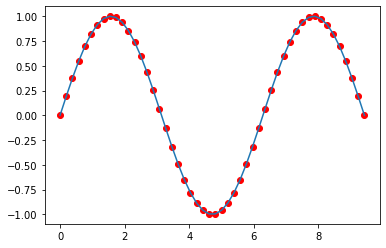

In [36]:
def make_sine_wave(num_points=100, cycles=5):
    max_x = np.pi/2.0 * (cycles + 1)
    time = np.linspace(0.0, max_x, num_points * cycles)
    y = np.sin(time)
    return np.column_stack((time, y))

points = make_sine_wave(num_points=10)
plt.plot(points[:, 0], points[:, 1])
plt.scatter(points[:, 0], points[:, 1], c='r')

Now we will simplify these points

Reduced points from 50 to 11
It took 0.056 milliseconds


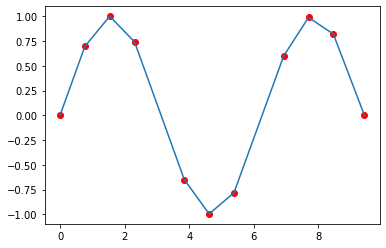

In [38]:
# We have to "convert" the numpy array to datastructure the library expects. This is a no copy operation.
points_mat = MatrixDouble(points, copy=False)
# Now time the execution and visualize the results
t0 = time.perf_counter()
simplified_mat = simplify_line_2d(points_mat, max_distance=0.1, high_quality=True)
t1 = time.perf_counter()
simplified = np.array(simplified_mat)

print(f"Reduced points from {points.shape[0]} to {simplified.shape[0]}")
print(f"It took {(t1-t0) * 1000:.3f} milliseconds")
plt.plot(simplified[:, 0], simplified[:, 1])
plt.scatter(simplified[:, 0], simplified[:, 1], c='r')

# 3D Line
Here is an example on 3D lines

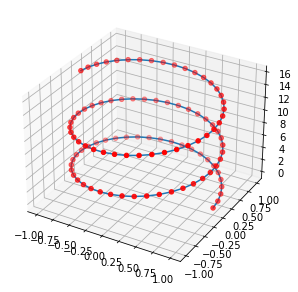

In [44]:
from mpl_toolkits import mplot3d

def make_helix(num_points=100, cycles=5):
    r = 1.0
    c = 1.0
    t = np.linspace(0.0, np.pi * cycles, num_points * cycles)
    x = r * np.cos(t)
    y = r * np.sin(t)
    z = c * t
    return np.column_stack((x, y, z))

points = make_helix(num_points=20)
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot(points[:, 0], points[:, 1], points[:,2])
ax.scatter(points[:, 0], points[:, 1], points[:,2], c='r')

Now we will simplify these points

Reduced points from 100 to 30
It took 0.060 milliseconds


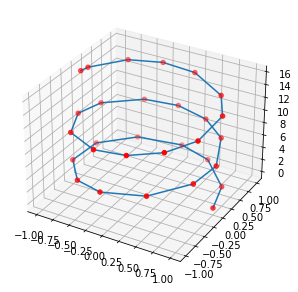

In [45]:
# We have to "convert" the numpy array to datastructure the library expects. This is a no copy operation.
points_mat = MatrixDouble(points, copy=False)
# Now time the execution and visualize the results
t0 = time.perf_counter()
simplified_mat = simplify_line_3d(points_mat, max_distance=0.1, high_quality=True)
t1 = time.perf_counter()
simplified = np.array(simplified_mat)

print(f"Reduced points from {points.shape[0]} to {simplified.shape[0]}")
print(f"It took {(t1-t0) * 1000:.3f} milliseconds")

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.plot(simplified[:, 0], simplified[:, 1], simplified[:,2])
ax.scatter(simplified[:, 0], simplified[:, 1], simplified[:,2], c='r')